In [91]:
!pip install openpyxl
!pip install geopy


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/31/b3/802576f2ea5dcb48501bb162e4c7b7b3ca5654a42b2c968ef98a797a4c79/geographiclib-2.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 445.2 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/125.4 kB 657.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 738.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.7 kB ? eta -:--:--
   ---------------------------------------- 40.7/40.7 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Read road files

format: lat, lon, lrp, lat lon lrp, etc. for all unnamed columns

In [392]:
import pandas as pd
ROADS_FILE = r"infrastructure/_roads.tsv"

def load_roads():
    """Load roads TSV."""
    df = pd.read_csv(
        ROADS_FILE,
        sep="\t",
        engine="python",
        dtype=str  # preserve everything as string
    )
    return df

print("Loading roads...")
roads_df = load_roads()
print(roads_df.head())
print(f"Road rows: {len(roads_df)}\n")

Loading roads...
   road  lrp1                lat1        lon1    lrp2                lat2  \
0    N1  LRPS          23.7060278   90.443333   LRPSa          23.7029167   
1  N101  LRPS          23.4541389  91.2128611   LRPSa  23.461888899999998   
2  N102  LRPS          23.4789716  91.1181938   LRPSa          23.4815827   
3  N103  LRPS  23.957027800000002  91.1155278  LRP001          23.9619167   
4  N104  LRPS          23.0096667  91.3994163   LRPSa  23.009277800000003   

                lon2 Unnamed: 7          Unnamed: 8         Unnamed: 9  ...  \
0         90.4504167      LRPSb  23.702777800000003  90.45047220000001  ...   
1             91.212     LRP001  23.462944399999998         91.2118056  ...   
2         91.1167771      LRPSb          23.4866663  91.11336109999999  ...   
3  91.11361109999999    LRP001a           23.967666  91.11188890000001  ...   
4         91.3952497     LRP001          23.0093056         91.3898052  ...   

  Unnamed: 4035 Unnamed: 4036       Unnamed: 

# Process road files

In [3]:
def process_roads(roads_df):
    """Processing roads."""
    return roads_df
    
roads_df = process_roads(roads_df)

# Read bridge files

In [393]:
BRIDGES_FILE = r"infrastructure/BMMS_overview.xlsx"

def load_bridges():
    """Load bridges Excel."""
    df = pd.read_excel(BRIDGES_FILE, dtype=str, engine="openpyxl")
    return df

print("Loading bridges...")
bridges_df = load_bridges()
print(bridges_df.head())
print(f"Bridge rows: {len(bridges_df)}\n")

Loading bridges...
  road      km              type  LRPName               name  length  \
0   N1     1.8       Box Culvert  LRP001a                  .    11.3   
1   N1   4.925       Box Culvert  LRP004b                  .     6.6   
2   N1   8.976  PC Girder Bridge  LRP008b  Kanch pur Bridge.  394.23   
3   N1   10.88       Box Culvert  LRP010b   NOYAPARA CULVERT     6.3   
4   N1  10.897       Box Culvert  LRP010c     ADUPUR CULVERT     6.3   

  condition structureNr                                           roadName  \
0         A      117861  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
1         A      117862  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
2         A      119889  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
3         A      112531  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
4         A      112532  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   

  chainage width constructionYear spans   zone circle     division  \
0      1.

# Process bridge files

In [ ]:
def process_bridges(bridges_df):
    """Processing bridges."""
    return bridges_df

bridges_df = process_bridges(bridges_df)

## Inspection of a road with bridges

C:\Users\lukav\AppData\Local\Temp\ipykernel_27272\1713552265.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = float(row[col_idx + 1])
C:\Users\lukav\AppData\Local\Temp\ipykernel_27272\1713552265.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon = float(row[col_idx + 2])


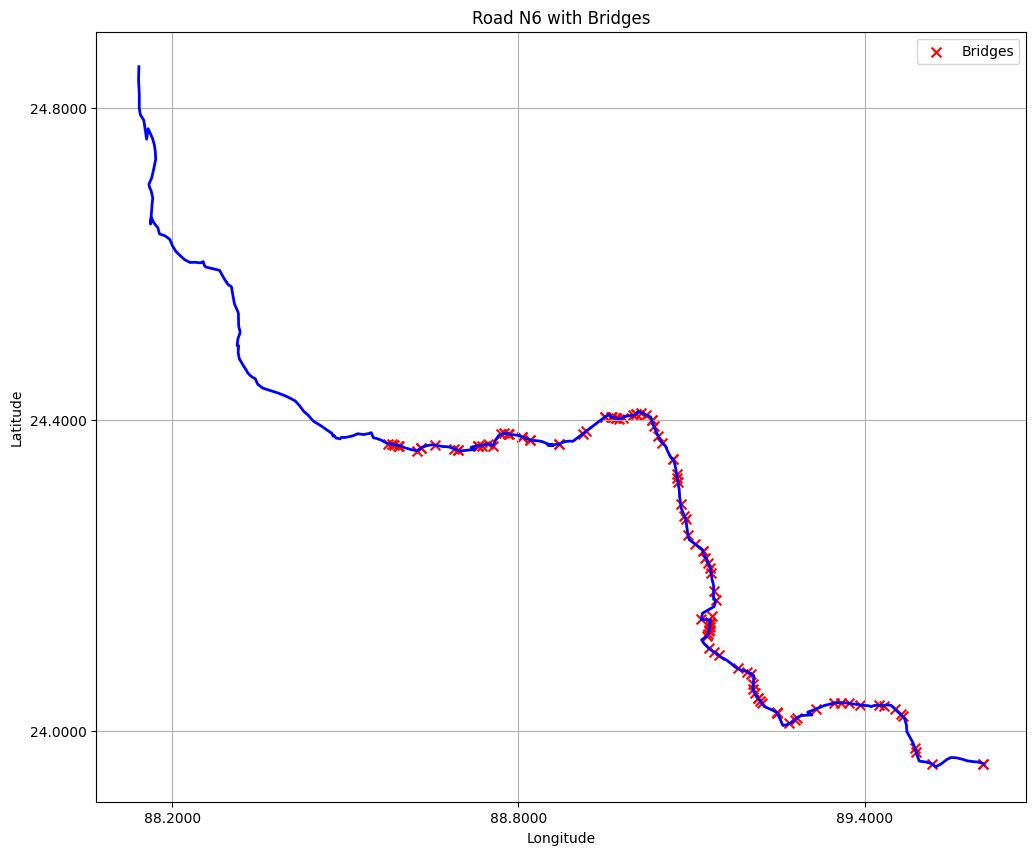

In [400]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

road_name = "N6"
road_data = roads_df[roads_df['road'] == road_name]

plt.figure(figsize=(12, 10))

for idx, row in road_data.iterrows():
    segment_coords = []
    col_idx = 1
    while col_idx + 2 < len(row):
        try:
            lat = float(row[col_idx + 1])
            lon = float(row[col_idx + 2])
            segment_coords.append((lon, lat))
        except (ValueError, TypeError):
            # Skip if value is missing or not convertible
            pass
        col_idx += 3
    
    if len(segment_coords) >= 2:
        segment_coords = np.array(segment_coords)
        plt.plot(segment_coords[:, 0], segment_coords[:, 1], color='blue', linewidth=2)

# Bridges
lat_col = 'lat'   # replace if your column name is different
lon_col = 'lon'

bridge_data = bridges_df[bridges_df['road'] == road_name]

# Convert to float and drop invalid values
bridge_coords = bridge_data[[lon_col, lat_col]].copy()
bridge_coords[lon_col] = pd.to_numeric(bridge_coords[lon_col], errors='coerce')
bridge_coords[lat_col] = pd.to_numeric(bridge_coords[lat_col], errors='coerce')
bridge_coords = bridge_coords.dropna()

# Now plot bridges
plt.scatter(bridge_coords[lon_col], bridge_coords[lat_col], color='red', marker='x', s=50, label='Bridges')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Road {road_name} with Bridges')
plt.grid(True)

# Only 3 ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

# Format ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.4f}"))

plt.legend()
plt.show()


## Fix a particular road and display

Selected road: N6
Road rows: 1
Bridge rows: 110

Updating 0 corrected LRPs in roads_df...

Total bridges updated: 0


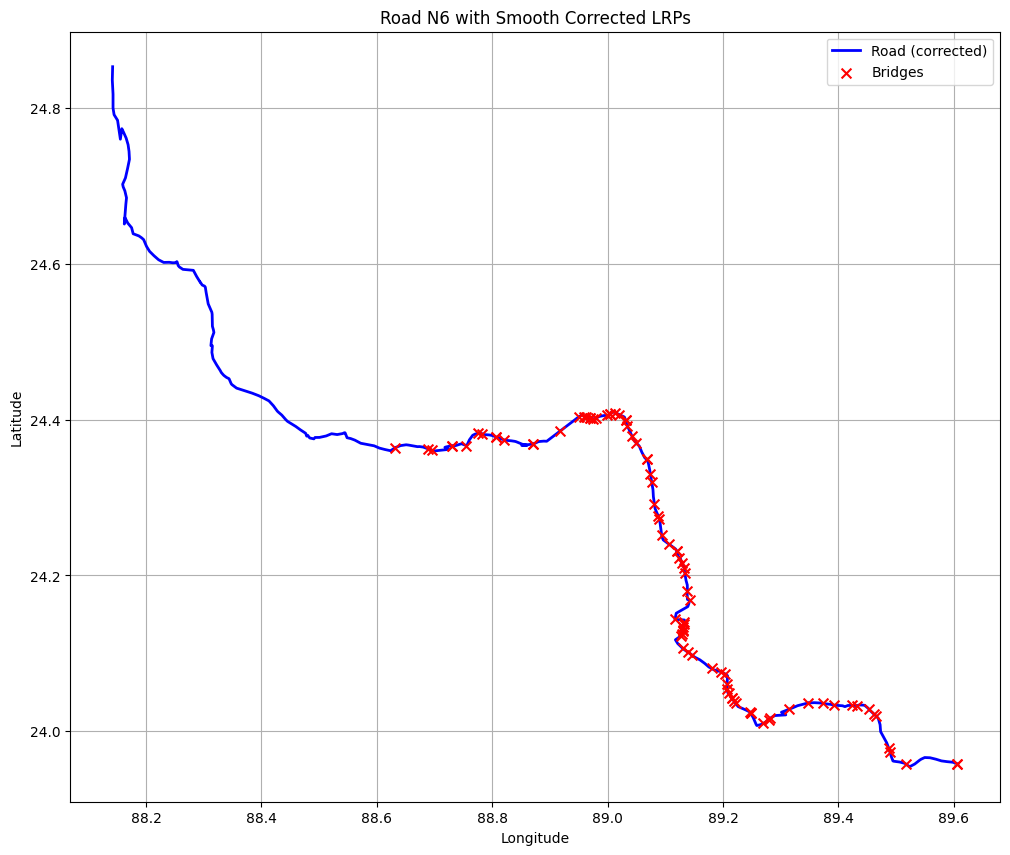


✓ LRP correction complete. Both roads_df and bridges_df have been updated.


In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Clean DataFrames ---
roads_df.columns = roads_df.columns.str.strip()
bridges_df.columns = bridges_df.columns.str.strip()

# Standardize road names
roads_df['road'] = roads_df['road'].astype(str).str.strip().str.upper()
bridges_df['road'] = bridges_df['road'].astype(str).str.strip().str.upper()

# Drop empty columns
roads_df = roads_df.dropna(axis=1, how='all')

# --- Select the road ---
road_name = "n6".strip().upper()
road_data = roads_df[roads_df['road'] == road_name].copy()
bridge_data = bridges_df[bridges_df['road'] == road_name].copy()

print(f"Selected road: {road_name}")
print("Road rows:", len(road_data))
print("Bridge rows:", len(bridge_data))

# --- Extract LRPs robustly ---
road_lrps = []
lrp_to_col_mapping = {}  # Track which column each LRP came from

for idx, row in road_data.iterrows():
    # Start from column 1, every 3 columns: LRP, lat, lon
    col_idx = 1
    while col_idx + 2 < len(row):
        lrp = row.iloc[col_idx]
        lat = row.iloc[col_idx + 1]
        lon = row.iloc[col_idx + 2]
        try:
            if pd.notna(lrp) and pd.notna(lat) and pd.notna(lon):
                lrp_str = str(lrp)
                road_lrps.append({
                    'lrp': lrp_str,
                    'lat': float(lat),
                    'lon': float(lon),
                    'original_lat': float(lat),
                    'original_lon': float(lon),
                    'col_idx': col_idx,
                    'row_idx': idx
                })
                lrp_to_col_mapping[lrp_str] = (idx, col_idx)
        except Exception as e:
            print(f"Skipping LRP at row {idx}, col {col_idx}: {e}")
        col_idx += 3

if not road_lrps:
    raise ValueError("No valid LRPs found for this road!")

# Convert to arrays
lrp_names = [p['lrp'] for p in road_lrps]
lrp_lats = np.array([p['lat'] for p in road_lrps])
lrp_lons = np.array([p['lon'] for p in road_lrps])
corrected_lrps = np.column_stack((lrp_lons, lrp_lats))

# --- Function for point-to-line deviation ---
def point_line_distance(p, a, b):
    p, a, b = np.array(p), np.array(a), np.array(b)
    if np.all(a == b):
        return np.linalg.norm(p - a)
    return np.abs(np.cross(b - a, a - p)) / np.linalg.norm(b - a)

def detect_wrong_lrps_sequences(corrected_lrps, factor_jump=6.0, factor_dev=2.0):
    n = len(corrected_lrps)
    wrong_flags = np.zeros(n, dtype=bool)

    # Compute distances between consecutive LRPs
    seg_lengths = np.linalg.norm(np.diff(corrected_lrps, axis=0), axis=1)
    median_spacing = np.median(seg_lengths)
    jump_threshold = factor_jump * median_spacing
    dev_threshold = factor_dev * median_spacing

    # Initial pass: detect large jumps
    for i in range(1, n):
        jump = np.linalg.norm(corrected_lrps[i] - corrected_lrps[i-1])
        if jump > jump_threshold:
            wrong_flags[i-1] = True
            wrong_flags[i] = True

    # Second pass: deviation from neighbors
    for i in range(1, n-1):
        if wrong_flags[i]:
            continue  # already flagged
        dist = point_line_distance(corrected_lrps[i], corrected_lrps[i-1], corrected_lrps[i+1])
        if dist > dev_threshold:
            wrong_flags[i] = True

    return wrong_flags

# Usage:
wrong_flags = detect_wrong_lrps_sequences(corrected_lrps, factor_jump=6.0, factor_dev=2.0)

# --- Identify sequences of wrong LRPs ---
wrong_sequences = []
seq_start = None
for i, flag in enumerate(wrong_flags):
    if flag:
        if seq_start is None:
            seq_start = i
    else:
        if seq_start is not None:
            wrong_sequences.append((seq_start, i-1))
            seq_start = None
if seq_start is not None:
    wrong_sequences.append((seq_start, len(corrected_lrps)-1))

# --- Interpolate/Extrapolate wrong LRPs ---
corrected_lrp_indices = []  # Track which LRPs were corrected

for start, end in wrong_sequences:
    prev_idx = start - 1
    next_idx = end + 1
    
    # Case 1: Wrong LRPs in the middle - interpolate
    if prev_idx >= 0 and next_idx < len(corrected_lrps):
        start_point = corrected_lrps[prev_idx]
        end_point = corrected_lrps[next_idx]
        num_points = end - start + 1
        corrected_lrps[start:end+1,0] = np.linspace(start_point[0], end_point[0], num_points+2)[1:-1]
        corrected_lrps[start:end+1,1] = np.linspace(start_point[1], end_point[1], num_points+2)[1:-1]
        corrected_lrp_indices.extend(range(start, end+1))
        print(f"  Interpolated LRPs {start} to {end} (middle)")
    
    # Case 2: Wrong LRPs at the beginning - extrapolate from first good points
    elif prev_idx < 0 and next_idx < len(corrected_lrps):
        # Find the next few good points to establish direction
        ref_points = []
        for i in range(next_idx, min(next_idx + 3, len(corrected_lrps))):
            if not wrong_flags[i]:
                ref_points.append(corrected_lrps[i])
        
        if len(ref_points) >= 2:
            # Calculate average direction from good points
            direction = ref_points[1] - ref_points[0]
            # Calculate average spacing
            spacing = np.linalg.norm(direction)
            direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
            
            # Extrapolate backwards
            for i in range(end, -1, -1):
                steps_back = next_idx - i
                corrected_lrps[i] = ref_points[0] - direction_unit * spacing * steps_back
            
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Extrapolated LRPs {start} to {end} (beginning)")
        else:
            # Fallback: just use the first good point
            for i in range(start, end+1):
                corrected_lrps[i] = corrected_lrps[next_idx]
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Set LRPs {start} to {end} to first good point (beginning fallback)")
    
    # Case 3: Wrong LRPs at the end - extrapolate from last good points
    elif prev_idx >= 0 and next_idx >= len(corrected_lrps):
        # Find the previous few good points to establish direction
        ref_points = []
        for i in range(prev_idx, max(prev_idx - 3, -1), -1):
            if not wrong_flags[i]:
                ref_points.append(corrected_lrps[i])
        
        if len(ref_points) >= 2:
            # Calculate average direction from good points
            direction = ref_points[0] - ref_points[1]
            # Calculate average spacing
            spacing = np.linalg.norm(direction)
            direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
            
            # Extrapolate forwards
            for i in range(start, end+1):
                steps_forward = i - prev_idx
                corrected_lrps[i] = ref_points[0] + direction_unit * spacing * steps_forward
            
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Extrapolated LRPs {start} to {end} (end)")
        else:
            # Fallback: just use the last good point
            for i in range(start, end+1):
                corrected_lrps[i] = corrected_lrps[prev_idx]
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Set LRPs {start} to {end} to last good point (end fallback)")
    
    # Case 4: All LRPs are wrong (shouldn't happen with good data)
    else:
        print(f"  WARNING: Cannot correct LRPs {start} to {end} - no reference points!")

# --- Update roads_df with corrected coordinates ---
print(f"\nUpdating {len(corrected_lrp_indices)} corrected LRPs in roads_df...")
for i in corrected_lrp_indices:
    lrp_info = road_lrps[i]
    row_idx = lrp_info['row_idx']
    col_idx = lrp_info['col_idx']
    
    # Update lat and lon in roads_df
    roads_df.at[row_idx, roads_df.columns[col_idx + 1]] = corrected_lrps[i, 1]  # lat
    roads_df.at[row_idx, roads_df.columns[col_idx + 2]] = corrected_lrps[i, 0]  # lon
    
    print(f"  Updated {lrp_info['lrp']}: "
          f"({lrp_info['original_lat']:.6f}, {lrp_info['original_lon']:.6f}) -> "
          f"({corrected_lrps[i, 1]:.6f}, {corrected_lrps[i, 0]:.6f})")

# --- Update bridges_df with corrected coordinates ---
# Create a mapping of LRP names to their corrected coordinates
lrp_coord_map = {lrp_names[i]: (corrected_lrps[i, 1], corrected_lrps[i, 0]) 
                 for i in range(len(lrp_names))}

# Update bridge coordinates
bridges_updated = 0
for idx, bridge in bridge_data.iterrows():
    lrp = bridge['LRPName']
    if lrp in lrp_coord_map and lrp_names.index(lrp) in corrected_lrp_indices:
        new_lat, new_lon = lrp_coord_map[lrp]
        old_lat = bridge['lat']
        old_lon = bridge['lon']
        
        # Update in the main bridges_df
        bridges_df.at[idx, 'lat'] = new_lat
        bridges_df.at[idx, 'lon'] = new_lon
        
        print(f"\nUpdated bridge at LRP {lrp}:")
        print(f"  Old coords: ({old_lat:.4f}, {old_lon:.4f})")
        print(f"  New coords: ({new_lat:.4f}, {new_lon:.4f})")
        bridges_updated += 1

print(f"\nTotal bridges updated: {bridges_updated}")

# --- Plot road and bridges ---
plt.figure(figsize=(12,10))
plt.plot(corrected_lrps[:,0], corrected_lrps[:,1], color='blue', linewidth=2, label='Road (corrected)')
if np.any(wrong_flags):
    plt.scatter(corrected_lrps[wrong_flags,0], corrected_lrps[wrong_flags,1],
                color='orange', s=100, label='Corrected LRPs', zorder=5)

# Plot bridges
bridge_coords = []
for idx, bridge in bridge_data.iterrows():
    lrp = bridge['LRPName']
    if lrp in lrp_names:
        bridge_idx = lrp_names.index(lrp)
        bridge_coords.append(corrected_lrps[bridge_idx])

if bridge_coords:
    bridge_coords = np.array(bridge_coords)
    plt.scatter(bridge_coords[:,0], bridge_coords[:,1], color='red', marker='x',
                s=50, label='Bridges', zorder=6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Road {road_name} with Smooth Corrected LRPs')
plt.grid(True)
plt.legend()
plt.show()

# --- Save updated dataframes (optional) ---
# roads_df.to_csv('roads_updated.csv', index=False)
# bridges_df.to_csv('bridges_updated.csv', index=False)
print("\n✓ LRP correction complete. Both roads_df and bridges_df have been updated.")

## Fix all roads into the df

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Clean DataFrames ---
roads_df.columns = roads_df.columns.str.strip()
bridges_df.columns = bridges_df.columns.str.strip()

# Standardize road names
roads_df['road'] = roads_df['road'].astype(str).str.strip().str.upper()
bridges_df['road'] = bridges_df['road'].astype(str).str.strip().str.upper()

# --- Function for point-to-line deviation ---
def point_line_distance(p, a, b):
    p, a, b = np.array(p), np.array(a), np.array(b)
    if np.all(a == b):
        return np.linalg.norm(p - a)
    return np.abs(np.cross(b - a, a - p)) / np.linalg.norm(b - a)

def detect_wrong_lrps_sequences(corrected_lrps, factor_jump=6.0, factor_dev=2.0):
    n = len(corrected_lrps)
    wrong_flags = np.zeros(n, dtype=bool)

    # Compute distances between consecutive LRPs
    seg_lengths = np.linalg.norm(np.diff(corrected_lrps, axis=0), axis=1)
    if len(seg_lengths) == 0:
        return wrong_flags
    
    median_spacing = np.median(seg_lengths)
    jump_threshold = factor_jump * median_spacing
    dev_threshold = factor_dev * median_spacing

    # Initial pass: detect large jumps
    for i in range(1, n):
        jump = np.linalg.norm(corrected_lrps[i] - corrected_lrps[i-1])
        if jump > jump_threshold:
            wrong_flags[i-1] = True
            wrong_flags[i] = True

    # Second pass: deviation from neighbors
    for i in range(1, n-1):
        if wrong_flags[i]:
            continue  # already flagged
        dist = point_line_distance(corrected_lrps[i], corrected_lrps[i-1], corrected_lrps[i+1])
        if dist > dev_threshold:
            wrong_flags[i] = True

    return wrong_flags

def process_road(road_name, roads_df, bridges_df, factor_jump=6.0, factor_dev=2.0):
    """Process a single road and return correction information."""
    
    road_data = roads_df[roads_df['road'] == road_name].copy()
    bridge_data = bridges_df[bridges_df['road'] == road_name].copy()
    
    if len(road_data) == 0:
        return None
    
    # --- Extract LRPs robustly ---
    road_lrps = []
    
    for idx, row in road_data.iterrows():
        # Start from column 1, every 3 columns: LRP, lat, lon
        col_idx = 1
        while col_idx + 2 < len(row):
            lrp = row.iloc[col_idx]
            lat = row.iloc[col_idx + 1]
            lon = row.iloc[col_idx + 2]
            try:
                if pd.notna(lrp) and pd.notna(lat) and pd.notna(lon):
                    lrp_str = str(lrp)
                    road_lrps.append({
                        'lrp': lrp_str,
                        'lat': float(lat),
                        'lon': float(lon),
                        'original_lat': float(lat),
                        'original_lon': float(lon),
                        'col_idx': col_idx,
                        'row_idx': idx
                    })
            except Exception as e:
                pass  # Skip invalid entries
            col_idx += 3
    
    if len(road_lrps) < 3:  # Need at least 3 points for meaningful correction
        return None
    
    # Convert to arrays
    lrp_names = [p['lrp'] for p in road_lrps]
    lrp_lats = np.array([p['lat'] for p in road_lrps])
    lrp_lons = np.array([p['lon'] for p in road_lrps])
    corrected_lrps = np.column_stack((lrp_lons, lrp_lats))
    
    # Detect wrong LRPs
    wrong_flags = detect_wrong_lrps_sequences(corrected_lrps, factor_jump, factor_dev)
    
    if not np.any(wrong_flags):
        return None  # No corrections needed
    
    # --- Identify sequences of wrong LRPs ---
    wrong_sequences = []
    seq_start = None
    for i, flag in enumerate(wrong_flags):
        if flag:
            if seq_start is None:
                seq_start = i
        else:
            if seq_start is not None:
                wrong_sequences.append((seq_start, i-1))
                seq_start = None
    if seq_start is not None:
        wrong_sequences.append((seq_start, len(corrected_lrps)-1))
    
    # --- Interpolate/Extrapolate wrong LRPs ---
    corrected_lrp_indices = []
    
    for start, end in wrong_sequences:
        prev_idx = start - 1
        next_idx = end + 1
        
        # Case 1: Wrong LRPs in the middle - interpolate
        if prev_idx >= 0 and next_idx < len(corrected_lrps):
            start_point = corrected_lrps[prev_idx]
            end_point = corrected_lrps[next_idx]
            num_points = end - start + 1
            corrected_lrps[start:end+1,0] = np.linspace(start_point[0], end_point[0], num_points+2)[1:-1]
            corrected_lrps[start:end+1,1] = np.linspace(start_point[1], end_point[1], num_points+2)[1:-1]
            corrected_lrp_indices.extend(range(start, end+1))
        
        # Case 2: Wrong LRPs at the beginning - extrapolate from first good points
        elif prev_idx < 0 and next_idx < len(corrected_lrps):
            # Find the next few good points to establish direction
            ref_points = []
            for i in range(next_idx, min(next_idx + 3, len(corrected_lrps))):
                if not wrong_flags[i]:
                    ref_points.append(corrected_lrps[i])
            
            if len(ref_points) >= 2:
                # Calculate average direction from good points
                direction = ref_points[1] - ref_points[0]
                # Calculate average spacing
                spacing = np.linalg.norm(direction)
                direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
                
                # Extrapolate backwards
                for i in range(end, -1, -1):
                    steps_back = next_idx - i
                    corrected_lrps[i] = ref_points[0] - direction_unit * spacing * steps_back
                
                corrected_lrp_indices.extend(range(start, end+1))
            else:
                # Fallback: just use the first good point
                for i in range(start, end+1):
                    corrected_lrps[i] = corrected_lrps[next_idx]
                corrected_lrp_indices.extend(range(start, end+1))
        
        # Case 3: Wrong LRPs at the end - extrapolate from last good points
        elif prev_idx >= 0 and next_idx >= len(corrected_lrps):
            # Find the previous few good points to establish direction
            ref_points = []
            for i in range(prev_idx, max(prev_idx - 3, -1), -1):
                if not wrong_flags[i]:
                    ref_points.append(corrected_lrps[i])
            
            if len(ref_points) >= 2:
                # Calculate average direction from good points
                direction = ref_points[0] - ref_points[1]
                # Calculate average spacing
                spacing = np.linalg.norm(direction)
                direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
                
                # Extrapolate forwards
                for i in range(start, end+1):
                    steps_forward = i - prev_idx
                    corrected_lrps[i] = ref_points[0] + direction_unit * spacing * steps_forward
                
                corrected_lrp_indices.extend(range(start, end+1))
            else:
                # Fallback: just use the last good point
                for i in range(start, end+1):
                    corrected_lrps[i] = corrected_lrps[prev_idx]
                corrected_lrp_indices.extend(range(start, end+1))
    
    return {
        'road_name': road_name,
        'road_lrps': road_lrps,
        'lrp_names': lrp_names,
        'corrected_lrps': corrected_lrps,
        'corrected_indices': corrected_lrp_indices,
        'bridge_data': bridge_data
    }

# --- Process all roads ---
all_roads = roads_df['road'].unique()
total_roads = len(all_roads)
total_lrps_corrected = 0
total_bridges_updated = 0
roads_with_corrections = 0

print(f"Processing {total_roads} roads...")
print("=" * 80)

for i in range(3):
    for road_idx, road_name in enumerate(all_roads, 1):
        result = process_road(road_name, roads_df, bridges_df)
        
        if result is None:
            continue  # No corrections needed for this road
        
        roads_with_corrections += 1
        road_lrps = result['road_lrps']
        lrp_names = result['lrp_names']
        corrected_lrps = result['corrected_lrps']
        corrected_indices = result['corrected_indices']
        bridge_data = result['bridge_data']
        
        # --- Update roads_df with corrected coordinates ---
        for i in corrected_indices:
            lrp_info = road_lrps[i]
            row_idx = lrp_info['row_idx']
            col_idx = lrp_info['col_idx']
            
            # Update lat and lon in roads_df
            roads_df.at[row_idx, roads_df.columns[col_idx + 1]] = corrected_lrps[i, 1]  # lat
            roads_df.at[row_idx, roads_df.columns[col_idx + 2]] = corrected_lrps[i, 0]  # lon
            
            total_lrps_corrected += 1
        
        # --- Update bridges_df with corrected coordinates ---
        lrp_coord_map = {lrp_names[i]: (corrected_lrps[i, 1], corrected_lrps[i, 0]) 
                         for i in range(len(lrp_names))}
        
        bridges_updated_this_road = 0
        for idx, bridge in bridge_data.iterrows():
            lrp = bridge['LRPName']
            if lrp in lrp_coord_map and lrp_names.index(lrp) in corrected_indices:
                new_lat, new_lon = lrp_coord_map[lrp]
                
                # Update in the main bridges_df
                bridges_df.at[idx, 'lat'] = new_lat
                bridges_df.at[idx, 'lon'] = new_lon
                
                bridges_updated_this_road += 1
                total_bridges_updated += 1

print("\n" + "=" * 80)
print(f"\n✓ Processing complete!")
print(f"  Roads with corrections: {roads_with_corrections}/{total_roads}")
print(f"  Total LRPs corrected: {total_lrps_corrected}")
print(f"  Total bridges updated: {total_bridges_updated}")
print(f"\nBoth roads_df and bridges_df have been updated in place.")

Processing 885 roads...


✓ Processing complete!
  Roads with corrections: 514/885
  Total LRPs corrected: 2404
  Total bridges updated: 521

Both roads_df and bridges_df have been updated in place.


## Percentages for matched bridges with roads + lrp

In [362]:
import numpy as np
import pandas as pd

lrp_block = roads_df.iloc[:, 1:]   # everything after road
records = []

for _, row in roads_df.iterrows():

    road = row.iloc[0]

    values = row.iloc[1:].values

    # read in chunks of 3 → LRP / lat / lon
    for i in range(0, len(values), 3):

        lrp = values[i]

        if pd.isna(lrp):
            continue

        lat = values[i+1] if i+1 < len(values) else np.nan
        lon = values[i+2] if i+2 < len(values) else np.nan

        records.append([road, str(lrp).strip(), lat, lon])

roads_lrp_df = pd.DataFrame(
    records,
    columns=['road','LRPName','lrp_lat','lrp_lon']
)
bridges_df['LRPName'] = bridges_df['LRPName'].str.strip()
matched = bridges_df.merge(
    roads_lrp_df,
    on=['road','LRPName'],
    how='inner'
)
n_matched = len(matched)
total = len(bridges_df)

print("Matched bridges:", n_matched)
print("Total bridges:  ", total)
print("Match rate:     ", f"{n_matched/total:.2%}")


Matched bridges: 14896
Total bridges:   21407
Match rate:      69.58%


## Percentages for bridges with no roads

In [363]:
roads_in_roads = set(roads_df['road'].dropna().str.strip())
roads_in_bridges = set(bridges_df['road'].dropna().str.strip())

missing_roads = roads_in_bridges - roads_in_roads

print("Road names in bridges but NOT in roads_df:")
print(missing_roads)
print("Count of missing road names:", len(missing_roads))

bridges_with_missing_roads = bridges_df[
    bridges_df['road'].str.strip().isin(missing_roads)
]

print("Bridges whose road is not in roads_df:",
      len(bridges_with_missing_roads))

print(
    "Percentage:",
    f"{len(bridges_with_missing_roads)/len(bridges_df):.2%}"
)


Road names in bridges but NOT in roads_df:
{'Z8711', 'Z2033', 'Z5208', 'Z5458', 'Z5073', 'Z1632', 'Z6801', 'Z5071', 'Z3614', 'Z6814', 'Z1006', 'Z1503', 'Z1211', 'Z1090', 'R505', 'R750', 'R680', 'Z1705', 'Z2022', 'Z1463', 'Z1613', 'Z8948', 'R856', 'Z7048', 'Z5459', 'Z7049', 'Z5478', 'Z6815'}
Count of missing road names: 28
Bridges whose road is not in roads_df: 544
Percentage: 2.54%


## Processing bridges

In [396]:
roads_df['road'] = roads_df['road'].str.strip()
bridges_df['road'] = bridges_df['road'].str.strip()
bridges_df['LRPName'] = bridges_df['LRPName'].str.strip()

valid_roads = set(roads_df['road'])

bridges_df = bridges_df[
    bridges_df['road'].isin(valid_roads)
].copy()


import numpy as np
import pandas as pd

records = []

for _, row in roads_df.iterrows():

    road = row.iloc[0]
    values = row.iloc[1:].values

    for i in range(0, len(values), 3):

        lrp = values[i]

        if pd.isna(lrp):
            continue

        lat = values[i+1] if i+1 < len(values) else np.nan
        lon = values[i+2] if i+2 < len(values) else np.nan

        records.append([
            road,
            str(lrp).strip(),
            lat,
            lon
        ])

roads_lrp_df = pd.DataFrame(
    records,
    columns=['road','LRPName','lrp_lat','lrp_lon']
)


bridges_df = bridges_df.merge(
    roads_lrp_df,
    on=['road','LRPName'],
    how='left'
)

mask = bridges_df['lrp_lat'].notna() & bridges_df['lrp_lon'].notna()

bridges_df.loc[mask, 'lat'] = bridges_df.loc[mask, 'lrp_lat']
bridges_df.loc[mask, 'lon'] = bridges_df.loc[mask, 'lrp_lon']

bridges_df = bridges_df.drop(
    columns=['lrp_lat','lrp_lon']
)

print("Remaining bridges:", len(bridges_df))
print("Bridges updated from road LRP:", mask.sum())
print("Bridges kept original coords:", (~mask).sum())

Remaining bridges: 20920
Bridges updated from road LRP: 14896
Bridges kept original coords: 6024


In [402]:
def point_to_segment_distance(P, A, B):
    AP = P - A
    AB = B - A
    if np.dot(AB, AB) == 0:
        return np.linalg.norm(P - A), A
    t = np.dot(AP, AB) / np.dot(AB, AB)
    t = np.clip(t, 0, 1)
    proj = A + t * AB
    return np.linalg.norm(P - proj), proj

def build_road_lines(roads_df):
    road_lines = {}

    for road in roads_df['road'].unique():
        road_data = roads_df[roads_df['road'] == road]

        pts = []
        for _, row in road_data.iterrows():
            col_idx = 1
            while col_idx + 2 < len(row):
                lat = row.iloc[col_idx+1]
                lon = row.iloc[col_idx+2]

                if pd.notna(lat) and pd.notna(lon):
                    try:
                        pts.append([float(lon), float(lat)])
                    except:
                        pass

                col_idx += 3

        if len(pts) >= 2:
            road_lines[road] = np.array(pts, dtype=float)

    return road_lines

road_lines = build_road_lines(roads_df)
print(f"Built {len(road_lines)} road polylines")

SNAP_DIST = 25 / 111000   # 25 meters
MAX_ROAD_DIST = 1_000 / 111_000   # 10 km

snapped = 0
checked = 0
deleted = 0

to_delete = []

for idx, bridge in bridges_df.copy().iterrows():
    if pd.isna(bridge['lat']) or pd.isna(bridge['lon']):
        to_delete.append(idx)
        deleted += 1
        continue

    road = bridge['road']
    if road not in road_lines:
        to_delete.append(idx)
        deleted += 1
        continue

    P = np.array([bridge['lon'], bridge['lat']], dtype=float)
    road_line = road_lines[road]

    best_dist = np.inf
    best_proj = None

    for i in range(len(road_line)-1):
        A = road_line[i]
        B = road_line[i+1]
        d, proj = point_to_segment_distance(P, A, B)
        if d < best_dist:
            best_dist = d
            best_proj = proj

    checked += 1

    if best_dist > MAX_ROAD_DIST:
        to_delete.append(idx)
        deleted += 1
        continue

    if best_dist > SNAP_DIST:
        bridges_df.at[idx, 'lon'] = best_proj[0]
        bridges_df.at[idx, 'lat'] = best_proj[1]
        snapped += 1

# delete
bridges_df = bridges_df.drop(index=to_delete).reset_index(drop=True)

print(f"Checked {checked} bridges")
print(f"Snapped {snapped} bridges")
print(f"Deleted {deleted} bridges")

Built 876 road polylines
Checked 20882 bridges
Snapped 986 bridges
Deleted 567 bridges


## save the data to the files

In [403]:
roads_df.to_csv(
    ROADS_FILE,
    sep="\t",
    index=False,
    encoding="utf-8"
)
print("Saved output.")

Saved output.


In [404]:
bridges_df.to_excel(
    BRIDGES_FILE,
    index=False,
    sheet_name="BMMS_overview"
)
print("Saved output.")

Saved output.
